## HW Week 12 (#10) - Data fitting with various functions - Due Friday Nov 11, 2022

You will be using the same data "miniDR17.fits" from the TCU Online Week 11:<br>

Remember you need to remove Identified bad data, 
however data that are just bad in one quantity may remain
Use masking to remove any remaining bad values (typically 9999 or -9999 in this file, <b>but remember to remove Outlier!!!!  If you are not sure, ask!!!</b>). 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)


# Monte Carlo-version of 2 parameter Curve Fit that can use BOTH x and Y errors
def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


# Monte Carlo-version of 3 parameter Curve Fit that can use BOTH x and Y errors
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

# Monte Carlo-version of 4 parameter Curve Fit that can use BOTH x and Y errors
def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


In [2]:
# READ IN FITS FILES
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'TEFF'; format = 'E'
    name = 'TEFF_ERR'; format = 'E'
    name = 'LOGG'; format = 'E'
    name = 'LOGG_ERR'; format = 'E'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'VHELIO_AVG'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'FE_H'; format = 'E'
    name = 'FE_H_ERR'; format = 'E'
    name = 'O_FE'; format = 'E'
    name = 'O_FE_ERR'; format = 'E'
    name = 'NI_FE'; format = 'E'
    name = 'NI_FE_ERR'; format = 'E'
    name = 'NVISTIS'; format = 'J'
    name = 'VSCATTER'; format = 'E'
    name = 'ASPCAPFLAG'; format = 'K'
    name = 'STARFLAG'; format = 'K'
    name = 'EXTRATARG'; format = 'J'
    name = 'GAIA_PARALLAX'; format = 'E'
    name = 'GAIA_PARALLAX_ERROR'; for

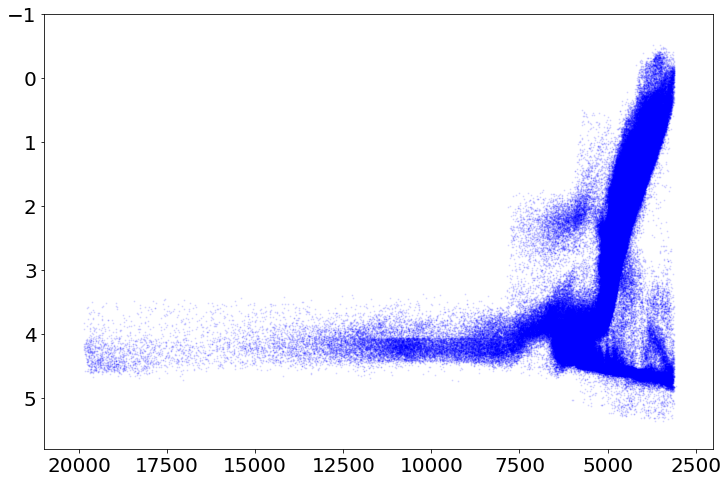

In [3]:
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['TEFF'][good]),star['LOGG'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(21000,2000)
ax.set_ylim(5.8,-1)

plt.show()

## DATA FIT 3

Fit a linear, polynomial (poly3), and a sigmoid functions and to the following selections of the data:<br>
3. Select stars only with with $GLAT > 60$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

POLY3: -0.042, -0.084, 0.007, 0.021


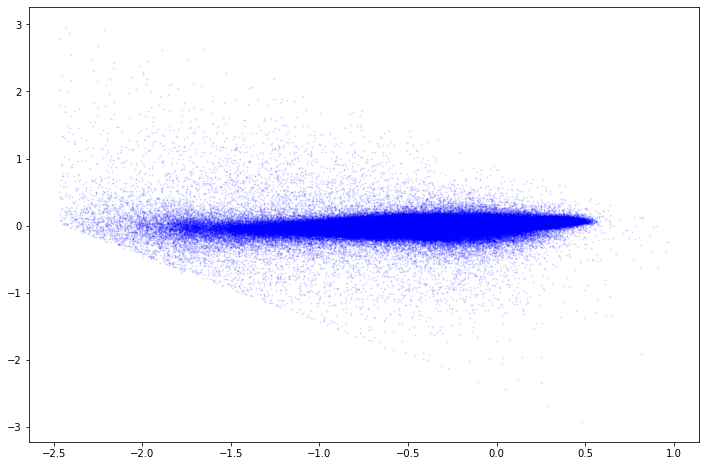

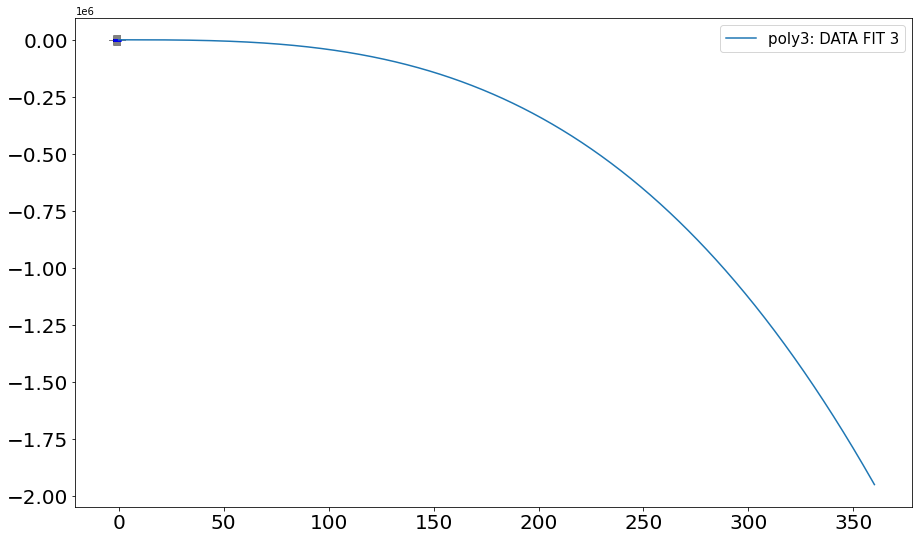

In [4]:
badbits = 2**23       
suspectbits = 2**16   
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good = np.where(gd)[0]


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['FE_H'][good]),star['NI_FE'][good],s=1,c='b',alpha=0.1)

#ax.xaxis.set_tick_params(labelsize=20)
#ax.yaxis.set_tick_params(labelsize=20)
#ax.set_xlim(21000,2000)
#ax.set_ylim(5.8,-1)

star = star[~np.isnan(star['FE_H'])]
star = star [~np.isnan(star['NI_FE'])]

ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] > 60)
cut1 = np.where(ct1)[0]


cfA, cfB, cfC, cfD = mcFit4(poly3, star['FE_H'][cut1], star['NI_FE'][cut1], star['FE_H'][cut1]/1000, \
                                     star['FE_H'][cut1]/1000,p0=[60,0.02,0,0])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')

 
fig1 = plt.figure(figsize=(15,9))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)


ax1.scatter(star['FE_H'][cut1],star['NI_FE'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['FE_H'][cut1]),star['NI_FE'][cut1], xerr=(star['FE_H'][cut1]/1000), \
             yerr=([star['NI_FE'][cut1]/1000]), ecolor='grey', fmt='none', capsize=5, zorder=0)

x_plot = np.linspace(0,360,1000)
ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: DATA FIT 3')


plt.legend(loc='best', fontsize=15)
plt.show()

## DATA FIT 4

Fit  a linear, a logfit, and a polynomial (poly2) functions and to the following selections of the data:<br>
4. Select stars only with with $GLAT < -10$  <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (star['J'] - star['K']) with error of (np.sqrt(star['J\_ERR']\*\*2 + star['K\_ERR']\*\*2))__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [35]:
badbits = 2**23       
suspectbits = 2**16   

star = star[~np.isnan(star['TEFF'])]
star = star[~np.isnan(star[star['J']-star['K']])]

gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < -10)
good = np.where(gd)[0]
 
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['TEFF'][good]),star[star['J']-star['K']][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(21000,2000)
ax.set_ylim(5.8,-1)

polyA, polyB, polyC = mcFit3(poly2, star['TEFF'][good], star[star['J']-star['K']][good], star['TEFF'][good]/1000, \
                                      star['TEFF'][good]/1000,p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

 
fig1 = plt.figure(figsize=(15,9))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

 
ax1.scatter(star['TEFF'][good],star[star['J']-star['K']][good],s=1,c='b',alpha=0.1)
ax1.errorbar((star['TEFF'][good]),star[star['J']-star['K']][good], xerr=(star['TEFF'][good]/1000), \
             yerr=(star[star['J']-star['K'][good]/1000]), ecolor='grey',fmt='none', capsize=5, zorder=0)

x_plot = np.linspace(0,360,1000)
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC), label='poly2: FIT')

plt.legend(loc='best', fontsize=15)
plt.show()

IndexError: arrays used as indices must be of integer (or boolean) type

## DATA FIT 5

Fit  a linear, a polynomial (poly3), and a cosfit functions and to the following selections of the data:<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

POLY3: -0.000, 0.015, -1.911, 32.643


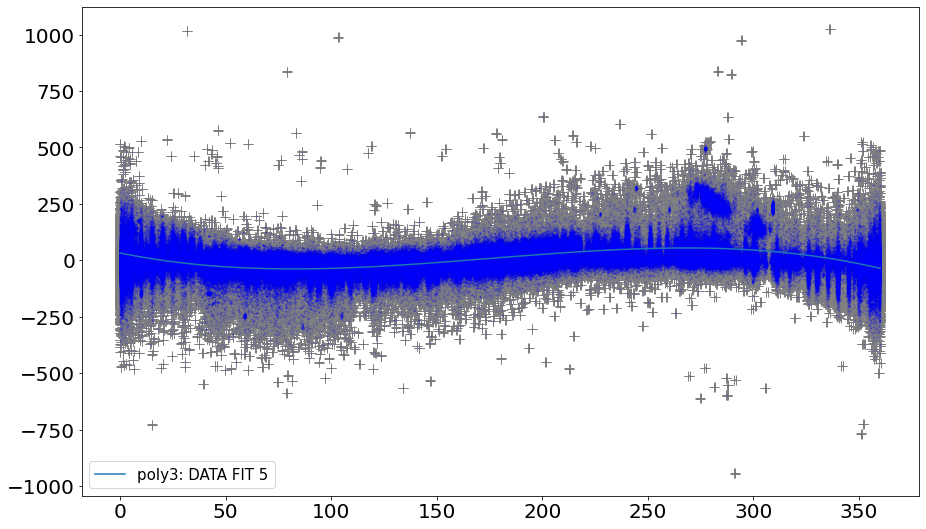

In [32]:
badbits = 2**23        
suspectbits = 2**16

star = star[~np.isnan(star['GLON'])]
star = star [~np.isnan(star['VHELIO_AVG'])]

ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < 10) | (star['GLAT'] > -10)
cut1 = np.where(ct1)[0]


cfA, cfB, cfC, cfD  = mcFit4(poly3, star['GLON'][cut1], star['VHELIO_AVG'][cut1], star['GLON'][cut1]/1000, \
                                     star['GLON'][cut1]/1000,p0=[60,0.02,0,0])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')



fig1 = plt.figure(figsize=(15,9))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS

ax1.scatter(star['GLON'][cut1],star['VHELIO_AVG'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['GLON'][cut1]),star['VHELIO_AVG'][cut1], xerr=(star['GLON'][cut1]/1000),\
             yerr=(star['VHELIO_AVG'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)



x_plot = np.linspace(0,360,1000)
ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: DATA FIT 5')

plt.legend(loc='best', fontsize=15)
plt.show()

## DATA FIT 6

Fit a linear, an exponential, and a polynomial (poly3) functions and to the following selections of the data:<br>
6. __Fit NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

POLY3: -0.001, 0.062, -1.123, 5.868


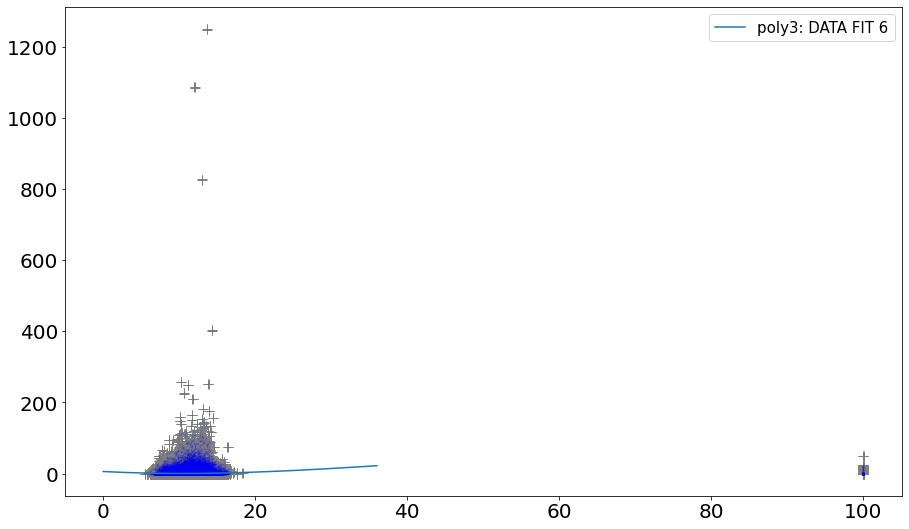

In [36]:
badbits = 2**23        
suspectbits = 2**16

star = star[~np.isnan(star['J'])]
star = star [~np.isnan(star['VSCATTER'])]



ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['J'] >= 1) 
cut1 = np.where(ct1)[0]

cfA, cfB, cfC, cfD = mcFit4(poly3, star['J'][cut1], star['VSCATTER'][cut1], star['J'][cut1]/1000, \
                                     star['J'][cut1]/1000,p0=[0,0,0,1])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


fig1 = plt.figure(figsize=(15,9))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)


ax1.scatter(star['J'][cut1],star['VSCATTER'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['J'][cut1]),star['VSCATTER'][cut1], xerr=(star['J'][cut1]/1000),
             yerr=(star['VSCATTER'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)



x_plot = np.linspace(0,36,100)

ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: DATA FIT 6')

plt.legend(loc='best', fontsize=15)
plt.show()

## DATA FIT 7

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
7. __Fit RA  vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

POLY2: 0.001, -0.280, 17.129
POLY3: 0.000, -0.000, -0.164, 13.163


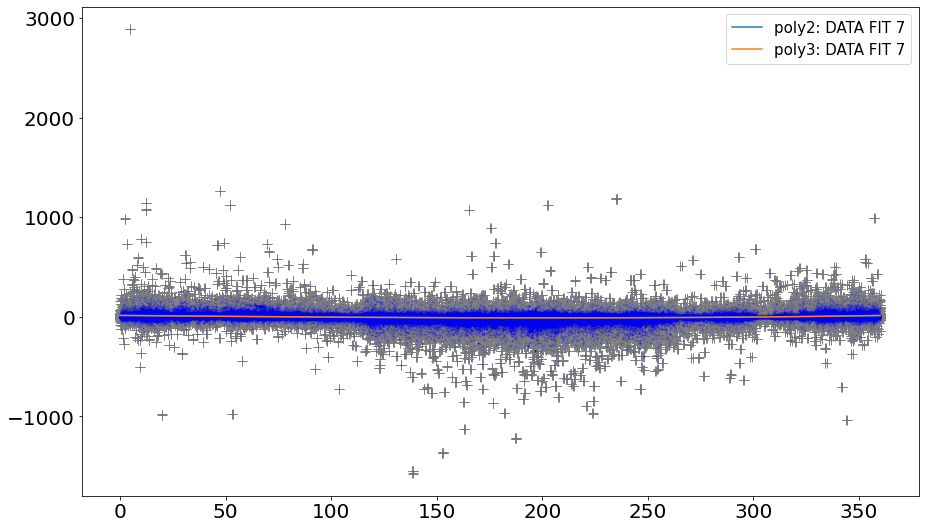

In [37]:
badbits = 2**23        
suspectbits = 2**16

star = star[~np.isnan(star['RA'])]
star = star [~np.isnan(star['GAIA_PMRA'])]

ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < 10) | (star['GLAT'] > -10)
cut1 = np.where(ct1)[0]


polyA, polyB, polyC = mcFit3(poly2, star['RA'][cut1], star['GAIA_PMRA'][cut1], star['RA'][cut1]/1000, \
                                      star['RA'][cut1]/1000,p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

cfA, cfB, cfC, cfD = mcFit4(poly3, star['RA'][cut1], star['GAIA_PMRA'][cut1], star['RA'][cut1]/1000, \
                                     star['RA'][cut1]/1000,p0=[60,0.02,0,0])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')

fig1 = plt.figure(figsize=(15,9))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)


ax1.scatter(star['RA'][cut1],star['GAIA_PMRA'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['RA'][cut1]),star['GAIA_PMRA'][cut1], xerr=(star['RA'][cut1]/1000),
             yerr=(star['GAIA_PMRA'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)



x_plot = np.linspace(0,360,1000)
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC), label='poly2: DATA FIT 7')

ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: DATA FIT 7')

plt.legend(loc='best', fontsize=15)
plt.show()

## DATA FIT 8

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
8. select stars with only TEFF < 6000 and LOGG < 3<br>
__Fit TEFF (TEFF_ERR)  vs.  LOGG (LOGG_ERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

POLY2: 0.000, -0.005, 13.421
POLY3: -0.000, 0.000, -0.078, 124.637


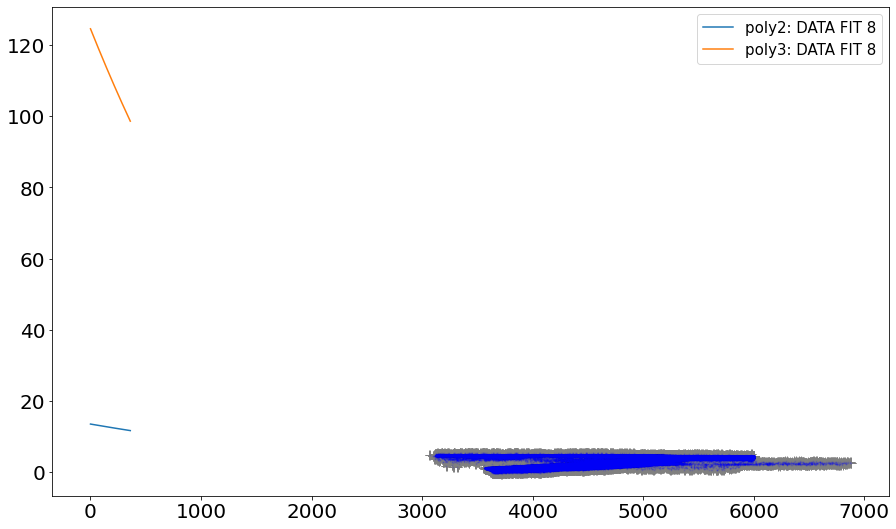

In [38]:
badbits = 2**23        
suspectbits = 2**16

star = star[~np.isnan(star['TEFF'])]
star = star [~np.isnan(star['LOGG'])]

ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['TEFF'] < 6000) | (star['LOGG'] < 3)
cut1 = np.where(ct1)[0]


polyA, polyB, polyC = mcFit3(poly2, star['TEFF'][cut1], star['LOGG'][cut1], star['TEFF'][cut1]/1000, \
                                      star['TEFF'][cut1]/1000,p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

cfA, cfB, cfC, cfD = mcFit4(poly3, star['TEFF'][cut1], star['LOGG'][cut1], star['TEFF'][cut1]/1000, \
                                     star['TEFF'][cut1]/1000,p0=[60,0.02,0,0])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


fig1 = plt.figure(figsize=(15,9))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)


ax1.scatter(star['TEFF'][cut1],star['LOGG'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['TEFF'][cut1]),star['LOGG'][cut1], xerr=(star['TEFF'][cut1]/1000),
             yerr=(star['LOGG'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)



x_plot = np.linspace(0,360,1000)
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC), label='poly2: DATA FIT 8')

ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: DATA FIT 8')

plt.legend(loc='best', fontsize=15)
plt.show()

## DATA FIT 9

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
9. __Fit GAIA_PARALLAX (GAIA_PARALLAX_ERROR) vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

POLY2: 0.007, -1.256, -0.610
POLY3: 0.000, 0.004, -1.200, -0.684


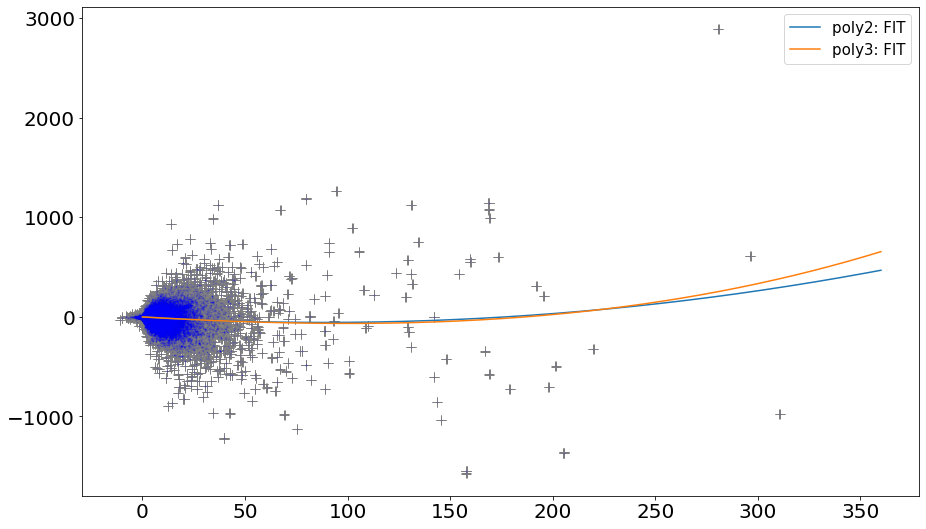

In [41]:
badbits = 2**23        
suspectbits = 2**16

star = star[~np.isnan(star['GAIA_PARALLAX'])]
star = star [~np.isnan(star['GAIA_PMRA'])]

ct1 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
     (star['GLAT'] < 10) | (star['GLAT'] > -10)
cut1 = np.where(ct1)[0]

polyA, polyB, polyC = mcFit3(poly2, star['GAIA_PARALLAX'][cut1], star['GAIA_PMRA'][cut1], star['GAIA_PARALLAX'][cut1]/1000, \
                                      star['GAIA_PARALLAX'][cut1]/1000,p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

cfA, cfB, cfC, cfD  = mcFit4(poly3, star['GAIA_PARALLAX'][cut1], star['GAIA_PMRA'][cut1], star['GAIA_PARALLAX'][cut1]/1000, \
                                     star['GAIA_PARALLAX'][cut1]/1000,p0=[60,0.02,0,0])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')

fig1 = plt.figure(figsize=(15,9))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

ax1.scatter(star['GAIA_PARALLAX'][cut1],star['GAIA_PMRA'][cut1],s=1,c='b',alpha=0.1)
ax1.errorbar((star['GAIA_PARALLAX'][cut1]),star['GAIA_PMRA'][cut1], xerr=(star['GAIA_PARALLAX'][cut1]/1000),
             yerr=(star['GAIA_PMRA'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)



x_plot = np.linspace(0,360,1000)
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC), label='poly2: FIT')

ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: FIT')

plt.legend(loc='best', fontsize=15)
plt.show()